In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter # To format tick labels in a more readable format
import matplotlib.ticker as ticker # To format tick labels in a more readable format
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_excel('insurance_claims_raw.xlsx')
df.head()

months_as_customer   age  policy_number policy_bind_date policy_state  \
0                 328  48.0         521585       2014-10-17           OH   
1                 228  42.0         342868       2006-06-27           IN   
2                 134  29.0         687698       2000-09-06           OH   
3                 256  41.0         227811       1990-05-25           IL   
4                 228  44.0         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500             1000.0                1406.91               0   
1    250/500             2000.0                1197.22         5000000   
2    100/300             2000.0                1413.14         5000000   
3    250/500             2000.0                1415.74         6000000   
4   500/1000             1000.0                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES            71610.0       6510.0   
1       468176  ...                       ?             5070.0        780.0   
2       430632  ...                      NO            34650.0       7700.0   
3       608117  ...                      NO            63400.0       6340.0   
4       610706  ...                      NO             6500.0       1300.0   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0        13020.0         52080       Saab         92x      2004   
1          780.0          3510   Mercedes        E400      2007   
2         3850.0         23100      Dodge         RAM      2007   
3         6340.0         50720  Chevrolet       Tahoe      2014   
4          650.0          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [12]:
df.drop('_c39', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 328 to 456
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   age                          998 non-null    float64       
 1   policy_number                1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            998 non-null    float64       
 6   policy_annual_premium        997 non-null    float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      999 non-null    object        
 11  insured_occupation           1000 non-null

In [5]:
# Count NaN values per column
nan_counts = df.isna().sum()

print(nan_counts[nan_counts > 0])

age                        2
policy_deductable          2
policy_annual_premium      3
insured_education_level    1
insured_hobbies            2
capital-gains              2
authorities_contacted      2
incident_state             2
total_claim_amount         4
injury_claim               1
property_claim             1
dtype: int64


In [18]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                           998.0  3.896293e+01  9.135425e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable             998.0  1.134269e+03  6.112519e+02      500.00   
policy_annual_premium         997.0  1.257001e+03  2.442651e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                 998.0  2.517645e+04  2.787738e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount            996.0  5.276747e+04  2.640535e+04      100.00   
injury_claim                  999.0  7.434945e+03  4.883158e+03        0.00   
property_claim                999.0  7.398629e+03  4.827051e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                   25%        50%        75%          max  
months_as_customer              115.75     199.50     276.25       479.00  
age                              32.00      38.00      44.00        64.00  
policy_number                335980.25  533135.00  759099.75    999435.00  
policy_deductable               500.00    1000.00    2000.00      2000.00  
policy_annual_premium          1090.32    1257.83    1415.74      2047.59  
umbrella_limit                    0.00       0.00       0.00  10000000.00  
insured_zip                  448404.50  466445.50  603251.00    620962.00  
capital-gains                     0.00       0.00   51075.00    100500.00  
capital-loss                 -51500.00  -23250.00       0.00         0.00  
incident_hour_of_the_day          6.00      12.00      17.00        23.00  
number_of_vehicles_involved       1.00       1.00       3.00         4.00  
bodily_injuries                   0.00       1.00       2.00         2.00  
witnesses                         1.00       1.00       2.00         3.00  
total_claim_amount            41812.50   57935.00   70620.00    114920.00  
injury_claim                   4290.00    6780.00   11310.00     21450.00  
property_claim                 4440.00    6750.00   10890.00     23670.00  
vehicle_claim                 30292.50   42100.00   50822.50     79560.00  
auto_year                      2000.00    2005.00    2010.00      2015.00

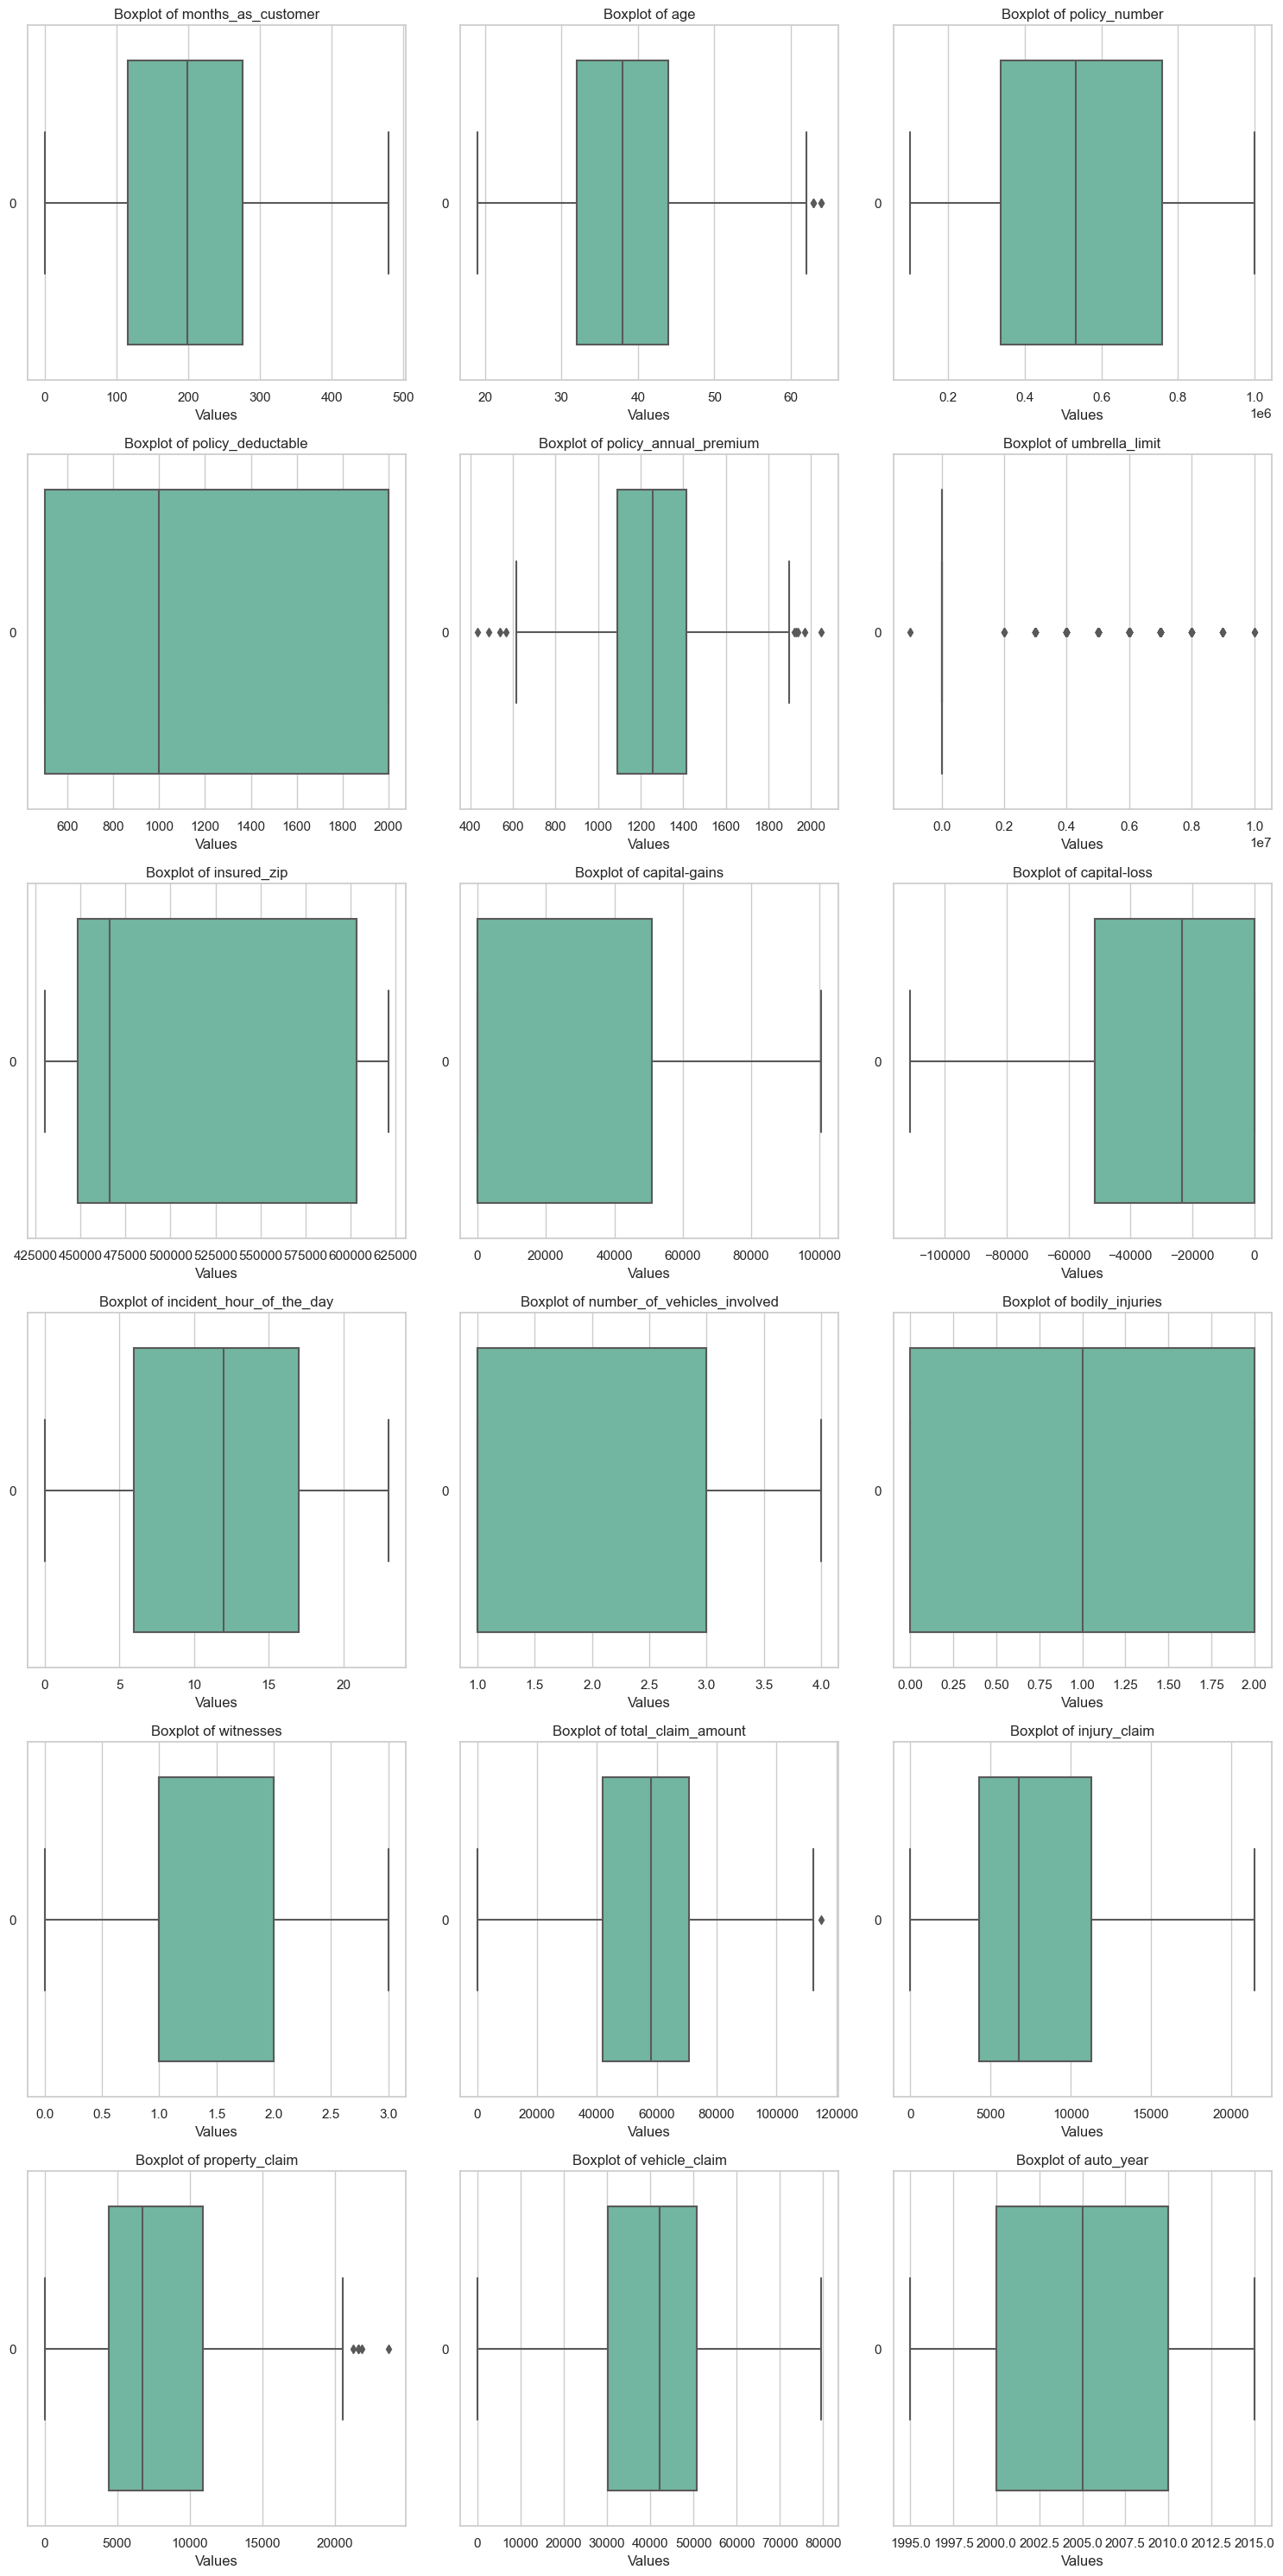

In [15]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Select columns with numerical data types
numerical_columns = df.select_dtypes(include=["number"]).columns

# Exclude columns with object or datetime data types
numerical_columns = [col for col in numerical_columns if df[col].dtype != "object" and df[col].dtype != "datetime64"]

# Determine the number of subplots based on the number of features
num_features = len(numerical_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features - 1) // num_cols + 1  # Number of rows in the subplot grid

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes if needed
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot boxplots for each feature
for i, (feature, ax) in enumerate(zip(numerical_columns, axes)):
    sns.boxplot(data=df[feature], ax=ax, orient="h", palette="Set2")
    ax.set_title(f"Boxplot of {feature}")
    ax.set_xlabel("Values")
    ax.set_ylabel("")

# Remove any empty subplot
if num_features % num_cols != 0:
    for ax in axes[num_features % num_cols:]:
        ax.remove()

# Adjust layout
plt.tight_layout()
plt.show()

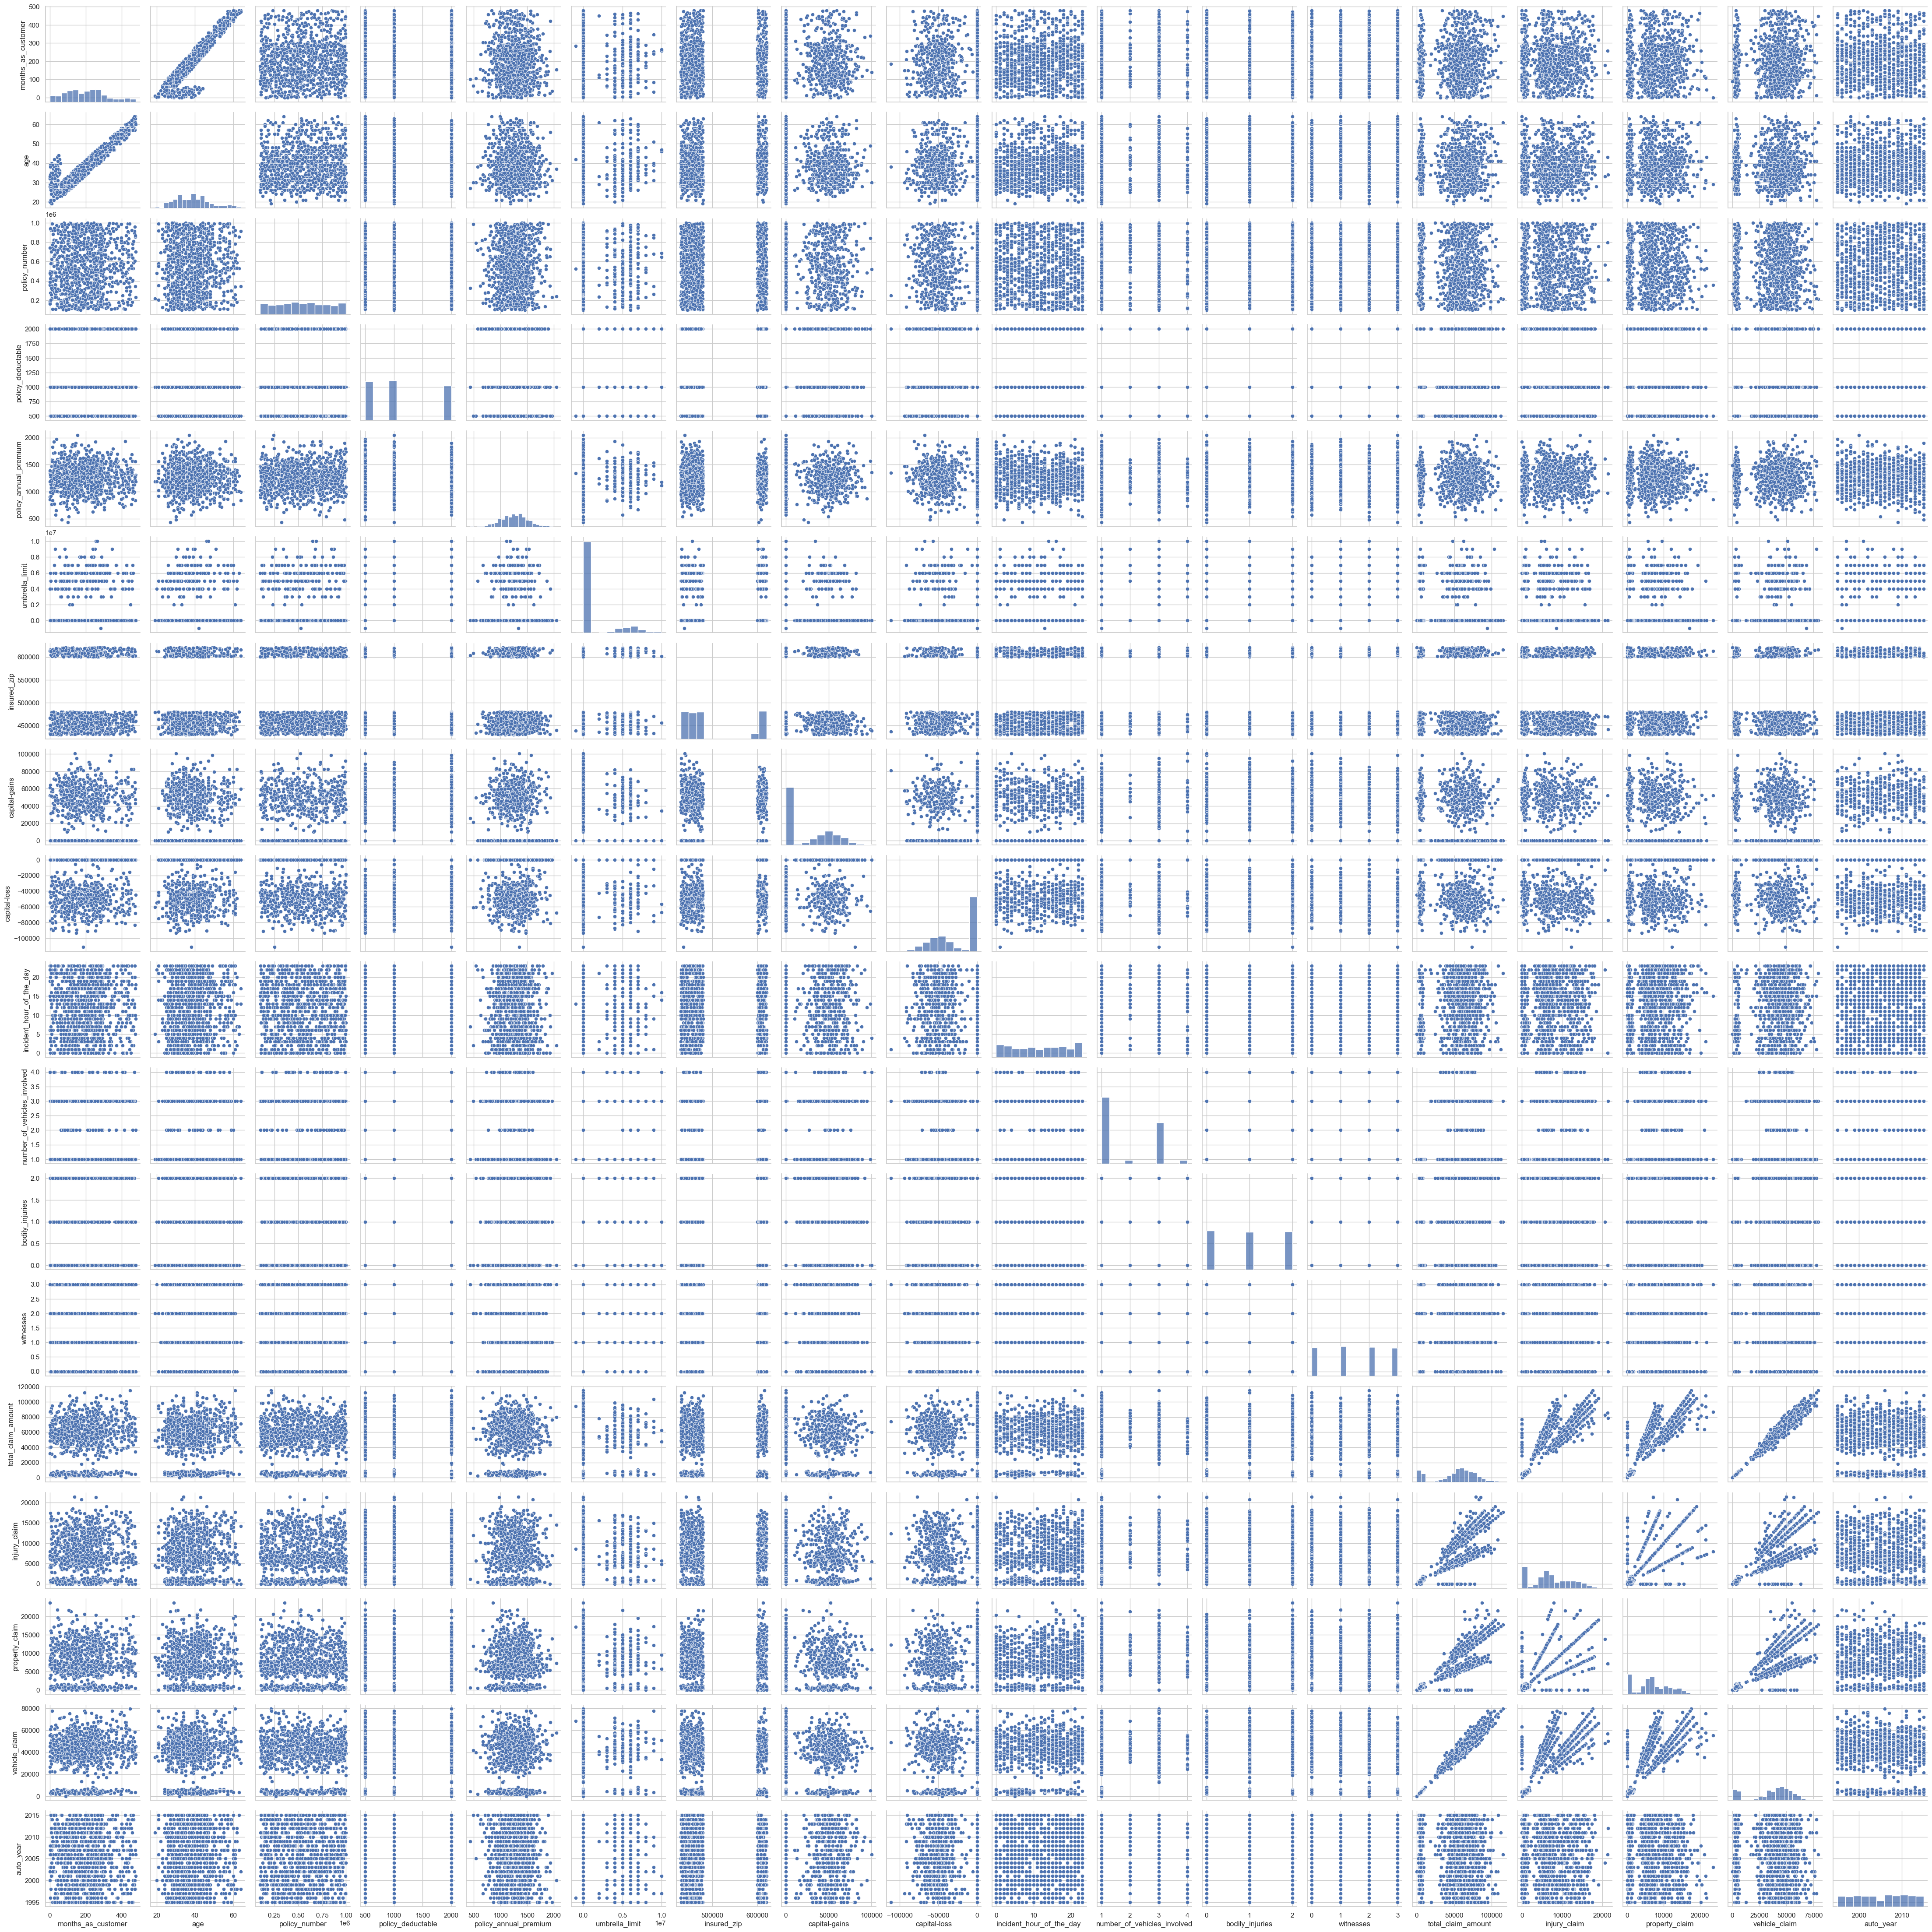

In [17]:
# Set the style of the seaborn plots
sns.set_style("whitegrid");

# Create a pairplot
sns.pairplot(df)

# Show plot
plt.show()

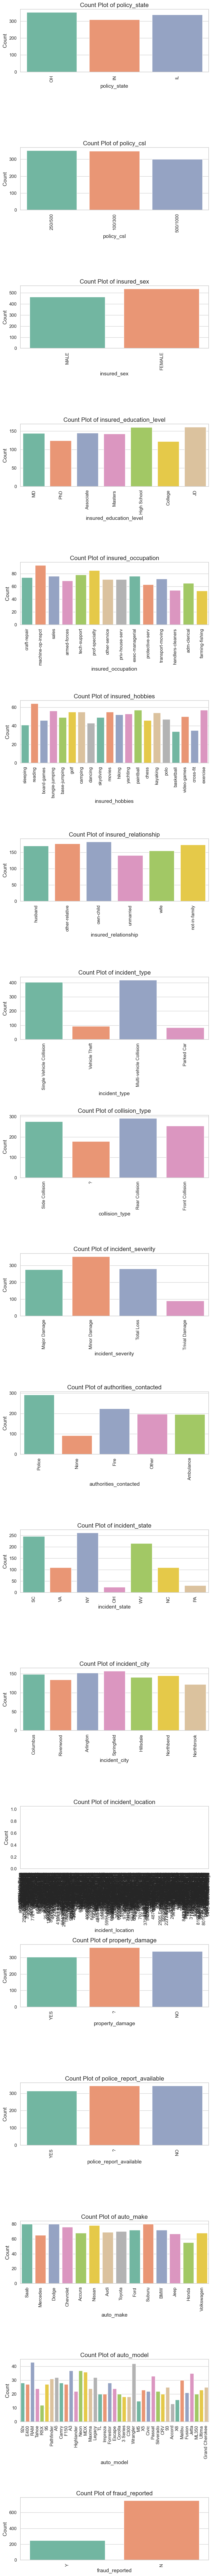

In [30]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Select columns with numerical data types
categorical_columns = df.select_dtypes(include=["object", "category"])

# Create subplots
fig, axes = plt.subplots(len(categorical_columns.columns), 1, figsize=(10, len(categorical_columns.columns) * 5))

# Plot boxplots for each feature
for i, feature in enumerate(categorical_columns.columns):
    sns.countplot(data=df, x = feature, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count Plot of {feature}', fontsize=16)
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()